In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, wilcoxon, ttest_rel

In [50]:
model_1_name = 'DenseNet169'
#model_2_name = 'EnhancedCNN'
model_2_name = 'SimpleCNN'
batch_size = 10
epochs = 50
k = 5

In [51]:
model1_results = pd.read_csv(f'results/{model_1_name}_k{k}_epoch{epochs}_batch{batch_size}_val_results.txt', delimiter=', ')
model2_results = pd.read_csv(f'results/{model_2_name}_k{k}_epoch{epochs}_batch{batch_size}_val_results.txt', delimiter=', ')

C:\Users\PC\AppData\Local\Temp\ipykernel_15748\1242909017.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  model1_results = pd.read_csv(f'results/{model_1_name}_k{k}_epoch{epochs}_batch{batch_size}_val_results.txt', delimiter=', ')
C:\Users\PC\AppData\Local\Temp\ipykernel_15748\1242909017.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  model2_results = pd.read_csv(f'results/{model_2_name}_k{k}_epoch{epochs}_batch{batch_size}_val_results.txt', delimiter=', ')


In [52]:
model1_results.columns

Index(['Fold', 'Epoch', 'Average Val Loss', 'Val Acc', 'F1 Score', 'AUC'], dtype='object')

In [53]:
f1_model1 = model1_results['F1 Score']
auc_model1 = model1_results['AUC']
accuracy_model1 = model1_results['Val Acc']

f1_model2 = model2_results['F1 Score']
auc_model2 = model2_results['AUC']
accuracy_model2 = model2_results['Val Acc']

results_model1 = np.array([f1_model1, auc_model1, accuracy_model1])
results_model2 = np.array([f1_model2, auc_model2, accuracy_model2])

In [54]:
results_model1.size

750

In [55]:
results_model2.size

750

In [56]:
diff_f1 = f1_model1 - f1_model2
diff_auc = auc_model1 - auc_model2
diff_accuracy = accuracy_model1 - accuracy_model2

diff_data = np.array([diff_f1, diff_auc, diff_accuracy])

In [57]:
mean_diff_f1 = np.mean(diff_f1)
mean_diff_auc = np.mean(diff_auc)
mean_diff_accuracy = np.mean(diff_accuracy)

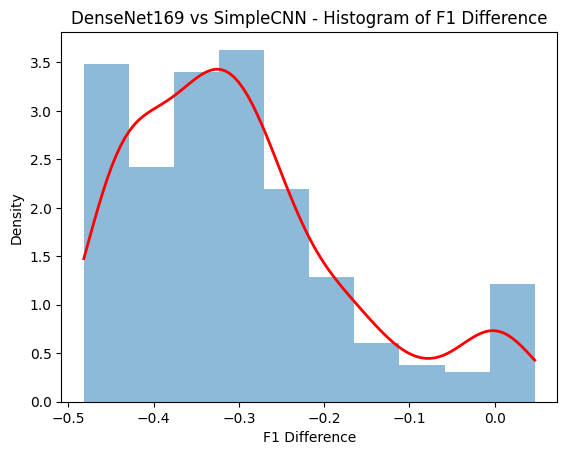

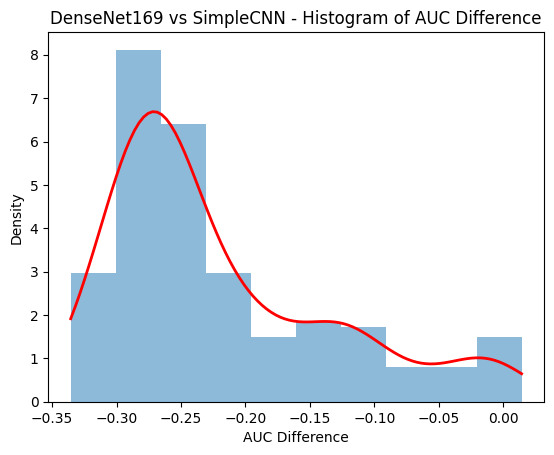

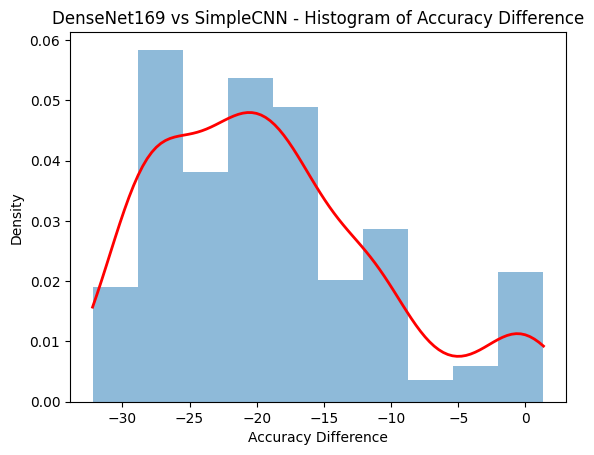

In [36]:
import scipy.stats as ss
# Generowanie histogramu dla różnicy F1
plt.hist(diff_f1, bins=10, alpha=0.5, density=True)
plt.xlabel('F1 Difference')
plt.ylabel('Density')
plt.title(f'{model_1_name} vs {model_2_name} - Histogram of F1 Difference')

# Generowanie krzywej gęstości dla różnicy F1
x = np.linspace(min(diff_f1), max(diff_f1), 100)
density_f1 = ss.gaussian_kde(diff_f1)
plt.plot(x, density_f1(x), color='red', linewidth=2)

# Wyświetlanie histogramu z krzywą gęstości dla różnicy F1
plt.savefig(f'{model_1_name}_vs_{model_2_name}_F1_difference_k{k}.svg')
plt.show()

# Analogicznie dla różnicy AUC
plt.hist(diff_auc, bins=10, alpha=0.5, density=True)
plt.xlabel('AUC Difference')
plt.ylabel('Density')
plt.title(f'{model_1_name} vs {model_2_name} - Histogram of AUC Difference')

x = np.linspace(min(diff_auc), max(diff_auc), 100)
density_auc = ss.gaussian_kde(diff_auc)
plt.plot(x, density_auc(x), color='red', linewidth=2)
plt.savefig(f'{model_1_name}_vs_{model_2_name}_AUC_difference_k{k}.svg')
plt.show()

# Analogicznie dla różnicy Accuracy
plt.hist(diff_accuracy, bins=10, alpha=0.5, density=True)
plt.xlabel('Accuracy Difference')
plt.ylabel('Density')
plt.title(f'{model_1_name} vs {model_2_name} - Histogram of Accuracy Difference')

x = np.linspace(min(diff_accuracy), max(diff_accuracy), 100)
density_accuracy = ss.gaussian_kde(diff_accuracy)
plt.plot(x, density_accuracy(x), color='red', linewidth=2)
plt.savefig(f'{model_1_name}_vs_{model_2_name}_ACC_difference_k{k}.svg')
plt.show()

In [58]:
is_normal = True
for diff in diff_data:
    if len(diff) < 3:
        raise ValueError("Data must be at least length 3.")
    _, p_value = shapiro(diff)
    print("Shapiro-Wilk p-value:", p_value)
    if p_value < 0.05:
        is_normal = False

if is_normal:
    print("Difference distribution is normal.")
else:
    print("Difference distribution is not normal.")

#Pytanie: Czy dla wszystkich różnic musi być normalny?

Shapiro-Wilk p-value: 3.870876882916541e-11
Shapiro-Wilk p-value: 7.848975917996992e-14
Shapiro-Wilk p-value: 4.994373359323845e-09
Difference distribution is not normal.


In [59]:
results_model1 - results_model2

array([[ 4.700e-02,  1.160e-02,  2.920e-02,  3.300e-03,  3.300e-03,
         1.600e-03,  0.000e+00,  3.300e-03,  3.300e-03,  0.000e+00,
         1.600e-03, -3.000e-03,  1.330e-02,  1.600e-03,  3.300e-03,
         4.900e-03, -1.150e-02, -2.590e-02, -8.200e-03, -4.310e-02,
        -1.042e-01, -8.000e-02, -9.590e-02, -1.137e-01, -1.324e-01,
        -1.526e-01, -1.782e-01, -1.534e-01, -1.935e-01, -1.305e-01,
        -1.593e-01, -1.593e-01, -1.909e-01, -1.671e-01, -1.006e-01,
        -1.599e-01, -1.677e-01, -1.956e-01, -2.023e-01, -2.043e-01,
        -1.866e-01, -1.945e-01, -1.909e-01, -1.847e-01, -1.802e-01,
        -1.697e-01, -2.250e-01, -1.697e-01, -2.337e-01, -2.056e-01,
        -1.695e-01, -2.277e-01, -2.419e-01, -2.641e-01, -2.936e-01,
        -2.586e-01, -2.544e-01, -2.767e-01, -3.103e-01, -2.396e-01,
        -2.481e-01, -2.672e-01, -3.013e-01, -3.065e-01, -3.065e-01,
        -3.069e-01, -3.159e-01, -3.244e-01, -3.209e-01, -2.888e-01,
        -3.271e-01, -3.233e-01, -3.397e-01, -3.3

In [60]:
if is_normal:
    #test t-paired dla różnic (dla rozkładu normalnego)
    t_statistic, p_value_ttest = ttest_rel(results_model1, results_model2)
    print("T-Test p-values:", p_value_ttest)

    if any(p < 0.05 for p in p_value_ttest):
        print("There is a significant difference between the two models (p-value < 0.05)")
    else:
        print("There is no significant difference between the two models (p-value >= 0.05)")
else:
    #test Wilcoxona dla różnic (dla rozkładu nienormalnego)
    _, p_value_wilcoxon = wilcoxon(results_model1, results_model2)
    print("Wilcoxon p-values:", p_value_wilcoxon)

    if any(p < 0.05 for p in p_value_wilcoxon):
        print("There is a significant difference between the two models (p-value < 0.05)")
    else:
        print("There is no significant difference between the two models (p-value >= 0.05)")


c:\Users\PC\ML_Classification_Project\COVID-19-CT-Classification\env\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\PC\ML_Classification_Project\COVID-19-CT-Classification\env\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.